In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_theme(style="darkgrid")

In [57]:
df = pd.DataFrame()


In [58]:
def plot(X, y):
    '''
    plotting function to plot data points
    '''
    colors = ["r.", 'b.', 'g.']
    c = random.choice(colors)
    plt.plot(X, y, c)


In [59]:
# we are going to get data points in range
# X-> 0-5
# y-> 0.5
X = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X.shape, y.shape

((100, 1), (100, 1))

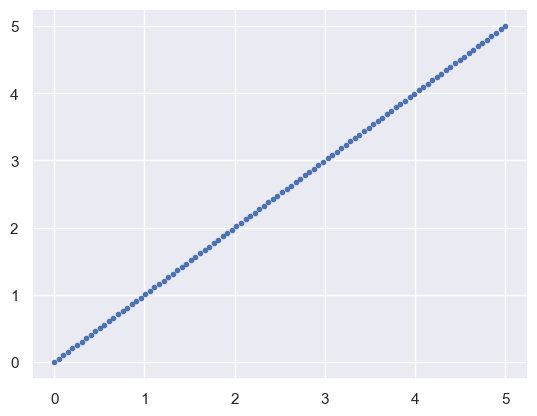

In [60]:
plot(X, y)


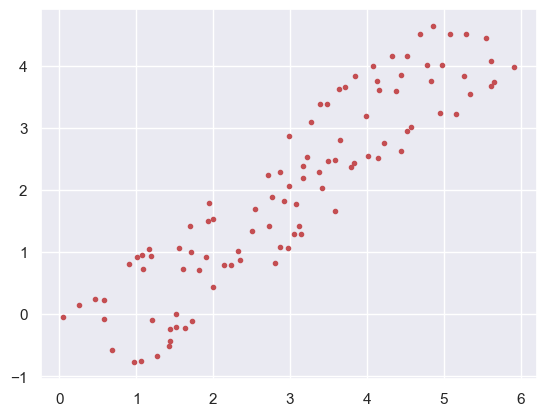

In [61]:
# now let's scatter these points
# as rand gives no in 0-1 range, we want slightly bigger numbers
random_points = np.random.rand(100).reshape(-1, 1)
X = X + random_points
y = y - random_points
plot(X, y)

# Below is the whole implementation of Linear regression from scratch.

In [62]:
# now out data is ready for linear regression
# to keep it simple we will use following hypotheses function
# h -> theta0*x + theta1*x

def plotLine(point1, point2, ax):
    '''
    Plots line
    '''
    styles = ["k--", "v-", "v--", "k:", "1-.", "2-.", "*:"]
    # c = random.choice(styles)
    c = "k--"
    ax[0, 0].plot(point1, point2, c)


def cost(X, y, theta0, c):
    '''
    returns value of cost after one loop throught the whole dataset
    '''
    m = X.shape[0]  # training examples/samples
    h = theta0*X + c  # hypothesis function
    J = np.sum(np.square(h - y))/(2*m)
    return J


def gradientDescent(X, y, theta0, ax, c, stats, iterations=100, alpha=0.01):
    '''
    Function to perform Gradient Descent
    '''
    min_value = 0
    max_value = np.ptp(X)
    max_value = 5
    m = X.shape[0]
    for i in range(iterations):
        ax[0, 0].plot(X, y, '.')
        J = cost(X, y, theta0, c)  # cost
        # print(f"iteration -> {i}, cost-> {J}")
        # print(f"theta0 -> {theta0}, theta1 -> {theta1}")

        # for plotting the line using hypothese function
        # print(f"min_value -. {min_value}, max_value -> {max_value}")
        # print(f"left point -> {left_point}, right point -> {right_point}")
        X_predict = np.linspace(min_value, max_value, 100)
        y_predict = theta0*X_predict + c
        plotLine(X_predict, y_predict, ax)

        # update parameters -> theta0 and theta1
        # simentounsly update both
        h = theta0*X + c
        theta0 = theta0 - alpha * ( (np.sum((h - y) * X) ) / m )
        c = c - alpha * (np.sum(h - y)/m)
        stats["costs"].append(J)
        stats["theta0s"].append(theta0)
        stats["cs"].append(c)

In [103]:
def LinearRegression(X, y, iterations=100, alpha=1e-3):
    '''
    Model to perform Linear Regression
    '''
    # theta0 = np.random.rand(1)
    costs, theta0s, cs = [], [], []
    stats = locals()

    theta0 = np.random.random(1)
    c = np.random.random(1)
    theta0 = -2
    c = 1
    fig, ax = plt.subplots(nrows=2, ncols=2)
    plt.subplots_adjust(hspace=0.5)
    gradientDescent(X=X, y=y, theta0=theta0, c=c, iterations=iterations, alpha=alpha, ax=ax, stats=stats)
    ax[0, 1].plot( np.arange(len(stats["costs"])) , stats["costs"])
    ax[1, 0].plot( np.arange(len(stats["theta0s"])) , stats["theta0s"])
    ax[1, 1].plot( np.arange(len(stats["cs"])) , stats["cs"])

    ax[1, 1].set_title("intercept")
    ax[1, 1].set_xlabel("Iterations")

    ax[0, 0].set_title("Linear Regression")
    ax[0, 0].set_ylabel("Value")

    ax[0, 1].set_title("Cost (J)")

    ax[1, 0].set_title("Theta0")
    ax[1, 0].set_ylabel("Value")
    ax[1, 0].set_xlabel("Iterations")

    plt.show()
    return (theta0, c)

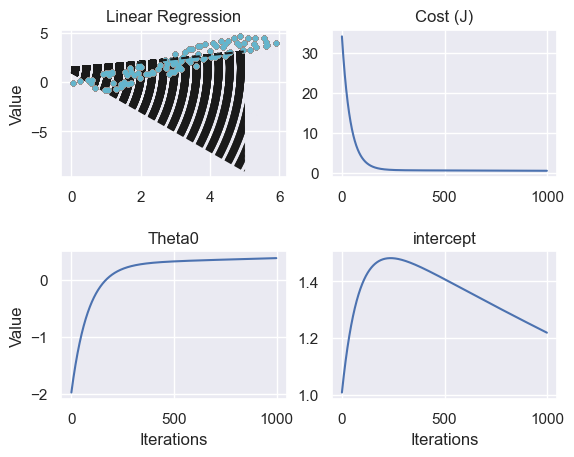

In [104]:
m, c = LinearRegression(X, y, 1000)


## Visualizing The cost function wrt m, c
## We won't consider the values of m, c we got from the optimization above...

m -> (500, 500)
c -> (500, 500)
X -> (100, 1)
y -> (100, 1)


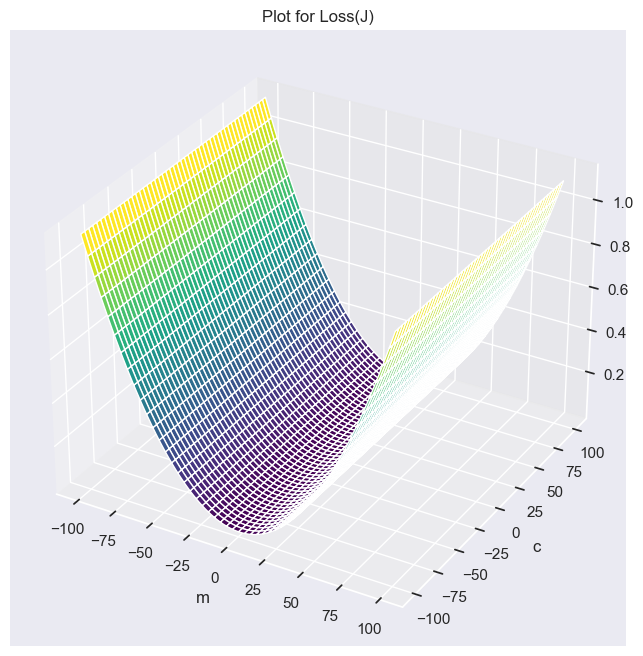

In [96]:
m = np.linspace(-100, 100, 500)
c = np.linspace(-100, 100, 500)
m, c = np.meshgrid(m, c)
print(f"m -> {m.shape}")
print(f"c -> {c.shape}")
print(f"X -> {X.shape}")
print(f"y -> {y.shape}")

# Just think about how is J calculated here, :)
res = np.zeros((m.shape))
for i in range(m.shape[0]):
    for j in range(m.shape[1]):
        res[i, j] = np.sum((X * m[i, j] - y)**2)
J = res

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(m, c, J, cmap="viridis")
ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('J')
# ax.set_zlim(-2, 2)
ax.set_title('Plot for Loss(J)');


# Now implement it for polynomial...

# First with the help of sklearn 

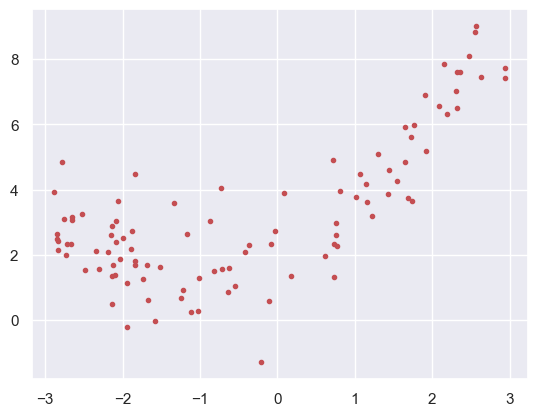

In [10]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plot(X, y)


In [11]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
poly = PolynomialFeatures(degree=2, include_bias=False)
# transforming X to also include X**2 etc. see docs
X_poly = poly.fit_transform(X)
lin_reg.fit(X_poly, y)

LinearRegression()

In [12]:
# explanation of above program
# out hypothesis function is like this->
# h = theta0 * x1 + theta1 * x2 + theta3 * x3 .. so on .
# usually x1 = 1 cause we want intercept.. so .
# x1, x2, x3 are different features here
# for eg like if there is a housing data with features as
# area, no_of_bedrooms, sea_facing etc we given them to our linear regression model.

# but here we have only 1 feature and our data needs polynomial equation to fit(as you can see yourself.)
# so we can make new feature from existing feature like x**2 etcc.
# this is what polynomialfeatures is doing..

In [13]:
X_poly.shape, X_poly[:3]


((100, 2),
 array([[-2.73148571,  7.4610142 ],
        [-2.52814003,  6.39149201],
        [ 1.6887798 ,  2.85197721]]))

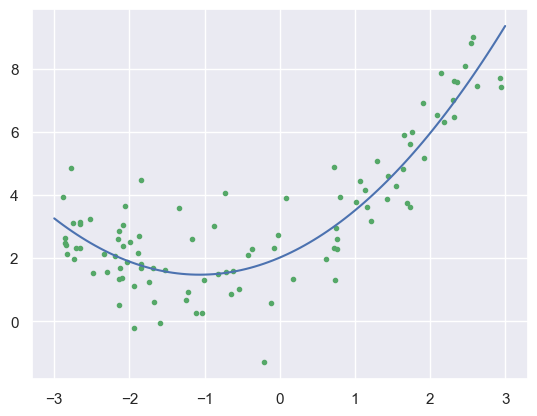

In [14]:
plot(X, y)
X_new = poly.fit_transform(np.linspace(-3, 3, 100).reshape(-1, 1))
y_predicted = lin_reg.predict(X_new)
plt.plot(np.linspace(-3, 3, 100), y_predicted)

In [15]:
from sklearn.linear_model import SGDRegressor
sgdRegressor = SGDRegressor()


In [16]:
sgdRegressor.fit(X_poly, y.ravel())


SGDRegressor()

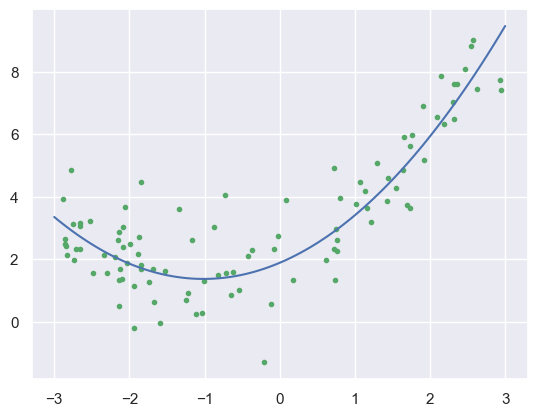

In [17]:
plot(X, y)
X_new = poly.fit_transform(np.linspace(-3, 3, 100).reshape(-1, 1))
y_predicted = sgdRegressor.predict(X_new)
plt.plot(np.linspace(-3, 3, 100), y_predicted)

# Some important point to keep in mind

If you want to do polynomical regression just transform the features using the
PolynomialFeatures

SGD is stochastic Gradient Descent.
Ig there is no implementation of minibatch GD.
But there is partial_fit method in SGD which you can use.
Do check docs..
There is also something warm_start=True which will start training where the model left off in case of SGDRegessor() and many others also so yeah do see it also. It can be very useful.

# Regularization 
## Ridge regression

In [18]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
# solver is most important here...
# cholesky uses a matrix factorization technique ..
# so yeah do check out different solvers
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[4.87967237]])

In [19]:
# as use see cholesky used matrix factorization for ridge regularization
# but if you want to use SGD (stochastic GD) ->
sgd_reg = SGDRegressor(penalty="l2")
# .ravel() to remove warning as y was (dim,1) instead of (dim,)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.84463213])

## Lasso regression

In [20]:
# same for lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)  # note there is no solver parameter/argument
# you can do same using SGDRegressor(penalty="l1")

# Elastic Net

In [21]:
from sklearn.linear_model import ElasticNet
elastic_new = ElasticNet(alpha=0.1, l1_ratio=0.5)

# using SGD
sgd_reg_elastic = SGDRegressor(alpha=0.1, penalty="elasticnet", l1_ratio=0.5)


# When to use What?

# Early stopping

In [22]:
len(X), X.shape

(100, (100, 1))

In [23]:
a = np.arange(10)
b = np.arange(10, 20)
np.sum(np.abs(a - b)) / len(a)


10.0